<a href="https://colab.research.google.com/github/ramalias/urban-expansion/blob/main/main-urban-expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#install library if needed

!pip install rasterio matplotlib numpy

In [15]:
#import library

import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import glob

In [8]:
#create main project folder
#run one time only

project_root = '/content/drive/MyDrive/project/urban-exansion'
os.makedirs(project_root, exist_ok=True)

#create folder inside project folder
os.makedirs(os.path.join(project_root, 'data'), exist_ok=True)

print('Workspace created at:', project_root)

Workspace created at: /content/drive/MyDrive/project/urban-exansion


# Unzip the Data

In [13]:
dataset_base_dir = '/content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel'

files = {
    "2019": os.path.join(dataset_base_dir, "S2A_MSIL2A_20191216T021101_N0500_R103_T52SDE_20230616T061041.SAFE.zip"),
    "2024": os.path.join(dataset_base_dir, "S2A_MSIL2A_20241219T021111_N0511_R103_T52SDE_20241219T055658.SAFE.zip")
}

extracted_dir = os.path.join(dataset_base_dir, 'unzipped')
os.makedirs(extraxted_dir, exist_ok=True)

In [14]:
for year, path in files.items():
    year_dir = os.path.join(extracted_dir, year)
    os.makedirs(year_dir, exist_ok=True)
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(year_dir)
    print(f"Extracted {year} data to: {year_dir}")

Extracted 2019 data to: /content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2019
Extracted 2024 data to: /content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2024


In [17]:
def find_bands(year_dir):
    band_files = {}
    for band in ['B02', 'B03', 'B04', 'B08']:
        pattern = f"{year_dir}/**/*{band}_10m.jp2"
        matches = glob.glob(pattern, recursive=True)
        if matches:
            band_files[band] = matches[0]
    return band_files

bands_2019 = find_bands(os.path.join(extracted_dir, "2019"))
bands_2024 = find_bands(os.path.join(extracted_dir, "2024"))

print("2019 Bands:", bands_2019)
print("2024 Bands:", bands_2024)

2019 Bands: {'B02': '/content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2019/S2A_MSIL2A_20191216T021101_N0500_R103_T52SDE_20230616T061041.SAFE/GRANULE/L2A_T52SDE_A023409_20191216T021102/IMG_DATA/R10m/T52SDE_20191216T021101_B02_10m.jp2', 'B03': '/content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2019/S2A_MSIL2A_20191216T021101_N0500_R103_T52SDE_20230616T061041.SAFE/GRANULE/L2A_T52SDE_A023409_20191216T021102/IMG_DATA/R10m/T52SDE_20191216T021101_B03_10m.jp2', 'B04': '/content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2019/S2A_MSIL2A_20191216T021101_N0500_R103_T52SDE_20230616T061041.SAFE/GRANULE/L2A_T52SDE_A023409_20191216T021102/IMG_DATA/R10m/T52SDE_20191216T021101_B04_10m.jp2', 'B08': '/content/drive/MyDrive/project/urban-exansion/data/01_Dataset_sentinel/unzipped/2019/S2A_MSIL2A_20191216T021101_N0500_R103_T52SDE_20230616T061041.SAFE/GRANULE/L2A_T52SDE_A023409_20191216T021102/IMG_DATA/R10m/T52SDE_20191

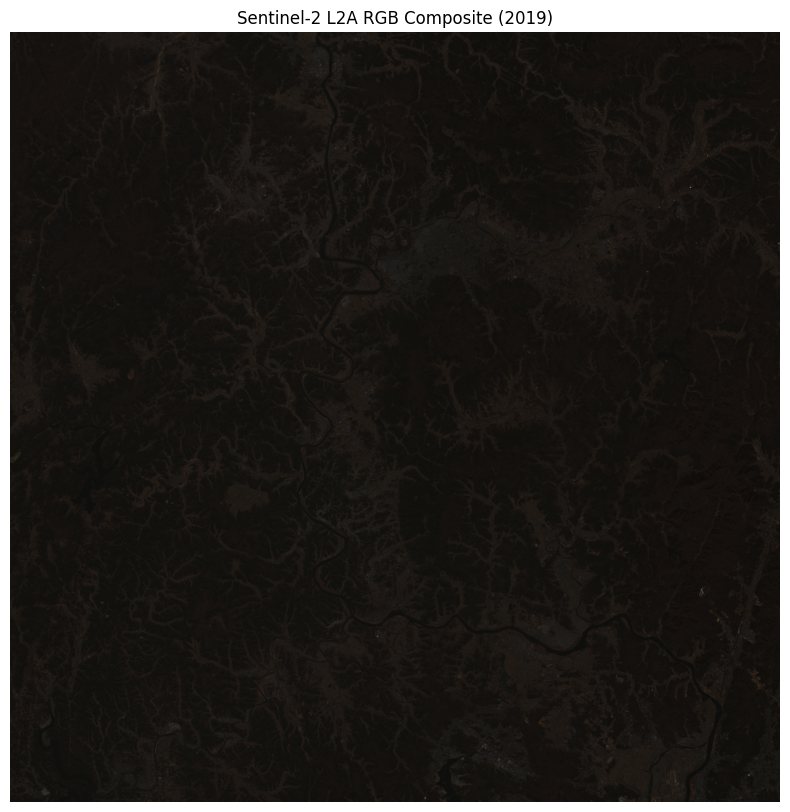

In [18]:
def show_rgb(band_paths, title):
    with rasterio.open(band_paths['B04']) as red:
        r = red.read(1)
    with rasterio.open(band_paths['B03']) as green:
        g = green.read(1)
    with rasterio.open(band_paths['B02']) as blue:
        b = blue.read(1)

    def normalize(band):
        return (band - band.min()) / (band.max() - band.min())

    rgb = np.dstack([normalize(r), normalize(g), normalize(b)])

    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_rgb(bands_2019, "Sentinel-2 L2A RGB Composite (2019)")

In [ ]:
show_rgb(bands_2024, "Sentinel-2 L2A RGB Composite (2019)")